In [5]:
import cv2 
import numpy as np 

import matplotlib.pyplot as plt 

In [24]:
def fourier_transform_rgb(input_image):
    f_size = 25
    fft_images=[]
    fft_images_log = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((input_image[:, :, i])))
        fft_images.append(rgb_fft)
        fft_images_log.append(np.log(abs(rgb_fft)))
    
    return fft_images, fft_images_log 

In [2]:
def write_canvas_images(list_images, names): 
    for i, name in zip(images, names): 
        cv2.imwrite(name, i) 

In [28]:
def normalize_image(img):
    img = img / np.max(img)
    return (img*255).astype('uint8')

def write_background_images(list_images, list_names): 
    for i, name in zip(list_images, list_names):
        image3 = cv2.merge((i,i,i))
        image_3_nor = normalize_image(image3)
        cv2.imwrite(name, image_3_nor)

In [29]:
image = cv2.imread("evening.jpeg")

In [30]:
fft_images, fft_images_log = fourier_transform_rgb(image)

# Getting the mask

In [31]:
names = ["canvas_image_r.png","canvas_image_g.png","canvas_image_b.png"]
canvas_images = []

for name in names: 
    canvas_images.append(cv2.imread(name,-1))

In [32]:
def get_mask_from_canvas(canvas_images):
    list_mask = []
    for image in canvas_images:
        list_mask.append(image[:,:,3])
        
    return list_mask

In [33]:
list_mask = get_mask_from_canvas(canvas_images)

In [41]:
def apply_mask(input_image, mask): 
    _, mask_thresh = cv2.threshold(mask, 120, 255, cv2.THRESH_BINARY)
    mask_bool = mask_thresh.astype('bool')
    input_image[mask_bool] = 1
    
    return input_image 


def apply_mask_all(list_images, list_mask): 
    final_result = []
    
    for (i,mask) in zip(list_images, list_mask):
        result = apply_mask(i,mask)
        final_result.append(result)
    return final_result

In [55]:
temp = apply_mask_all(fft_images, list_mask)

In [56]:
temp

[array([[  37.49361344 +97.17921281j, -106.06591968 -33.68301484j,
          232.67401783+209.00584982j, ...,  232.67401783-209.00584982j,
         -106.06591968 +33.68301484j,   37.49361344 -97.17921281j],
        [ -27.69005689 +92.98179235j,  -44.68480142-135.06508089j,
         -230.48725241 +46.49227284j, ...,  103.77893366 +30.15533346j,
         -132.73208468 +28.30355924j,  101.53555667 +50.1791139j ],
        [ -90.94652651-108.80688855j,   44.13575474+104.9452948j ,
           91.86628827  -5.35087008j, ...,  -44.2617866 +322.62676268j,
         -189.04541272-238.97591679j,   92.92811919 +83.7873029j ],
        ...,
        [-161.23664546+119.18350992j,  207.81992528-201.88867018j,
         -299.79261909+196.38856043j, ...,  -16.48560766  +8.50492617j,
           29.68241591 +10.73412405j,  118.8278842  +37.4378388j ],
        [  92.92811919 -83.7873029j , -189.04541272+238.97591679j,
          -44.2617866 -322.62676268j, ...,   91.86628827  +5.35087008j,
           44.135754

In [60]:
def inverse_furiour(image):
    final_image = []
    for c in image:
        channel = abs(np.fft.ifft2(c))
#         plt.imshow(channel)
#         plt.show()
        final_image.append(channel)
    final_image_assebled = np.dstack([final_image[0].astype('int'),
                                     final_image[1].astype('int'),
                                     final_image[2].astype('int')])
    return final_image_assebled

In [61]:
final = inverse_furiour(temp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


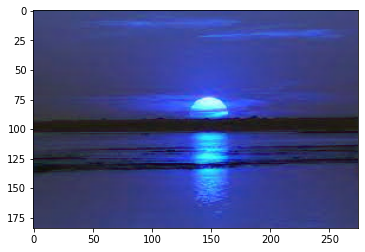

In [62]:
plt.imshow(final)

In [63]:
np.max(final)

290

In [64]:
np.min(final)

0